Limpeza <p>
Nessa etapa o objetivo é verificar valores inconsistentes, duplicatas de colunas e linhas, definir a tipagem dos dados e observar a distribuição de missing values, já traçando uma estratégia de preenchimento, se necessário.

# Dependências

In [1]:
# Importanando bibliotecas
import os
import cloudpickle
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
from src.data_cleaning import remover_duplicatas,remover_colunas_constantes
from sklearn.model_selection import train_test_split
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
%matplotlib inline

# Dados e Constantes

In [2]:
DATA_RAW_PATH = os.path.join('..','data','raw')
DATA_RAW_NAME = 'Safra_2018-2019.csv'
DATA_INTER_PATH = os.path.join('..','data','inter')
DATA_INTER_TRAIN_NAME = 'train_inter.csv'
DATA_INTER_TEST_NAME = 'test_inter.csv'
META_DATA_PATH = os.path.join(DATA_RAW_PATH,'dicionario_tipos.pkl')
TARGET = 'dano_na_plantacao'
df_raw = pd.read_csv(os.path.join(DATA_RAW_PATH,DATA_RAW_NAME), index_col=0)

# Split dos dados em treino e teste

Todo o tratamento de dados, análise exploratória e modelagem será desenvolvido nesse conjunto de treinamento. Ao dividir os dados em Treino e Teste antes das demais etapas, reduzimos os riscos de vazamentos de dados ou enviesamento. Assim, a partir de agora usaremos apenas esse dataset.

O modelo que será desenvolvido por meio do dataset é: Previsão do Dano na Plantação. Vamos seguir daqui em diante com o target `dano_na_plantacao` tratando-se de um problema de classificação multipla. 

In [3]:
#Separando os dados. 
X = df_raw.drop(TARGET, axis=1)
y = df_raw[TARGET]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2,  stratify= y, random_state=123)

In [4]:
#Dados de treino e de test
df_train = pd.concat([X_train,y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

In [5]:
# salvando os dados de teste
df_test.to_csv(os.path.join(DATA_INTER_PATH,DATA_INTER_TEST_NAME), index=False)
del df_test

In [6]:
#Lendo o dataset de treino.
df_train.head()

,Identificador_Agricultor,Estimativa_de_Insetos,Tipo_de_Cultivo,Tipo_de_Solo,Categoria_Pesticida,Doses_Semana,Semanas_Utilizando,Semanas_Sem_Uso,Temporada,dano_na_plantacao
27009,SCROP27010,984,0,1,2,25,12.0,19,3,0
79477,SCROP79478,851,0,0,2,20,27.0,7,2,0
76218,SCROP76219,283,0,0,3,35,27.0,0,3,0
33382,SCROP33383,2542,0,0,3,15,50.0,0,2,2
44927,SCROP44928,850,0,1,2,30,14.0,24,2,0


In [7]:
df_train.columns

Index(['Identificador_Agricultor', 'Estimativa_de_Insetos', 'Tipo_de_Cultivo', 'Tipo_de_Solo', 'Categoria_Pesticida', 'Doses_Semana', 'Semanas_Utilizando', 'Semanas_Sem_Uso', 'Temporada', 'dano_na_plantacao'], dtype='object')

In [8]:
df_train.shape

(64000, 10)

# Limpeza

In [9]:
#Criando dicionário para os tipos das variáveis.
dicionario_tipo = {}
dicionario_tipo['Identificador_Agricultor']='object'
dicionario_tipo['Estimativa_de_Insetos']='int'
dicionario_tipo['Tipo_de_Cultivo']='object'
dicionario_tipo['Tipo_de_Solo']='object'
dicionario_tipo['Categoria_Pesticida']='object'
dicionario_tipo['Doses_Semana']='int'
dicionario_tipo['Semanas_Utilizando']='float'
dicionario_tipo['Semanas_Sem_Uso']='int'
dicionario_tipo['Temporada']='object'
dicionario_tipo['dano_na_plantacao']='object'

In [10]:
df_train.head()

,Identificador_Agricultor,Estimativa_de_Insetos,Tipo_de_Cultivo,Tipo_de_Solo,Categoria_Pesticida,Doses_Semana,Semanas_Utilizando,Semanas_Sem_Uso,Temporada,dano_na_plantacao
27009,SCROP27010,984,0,1,2,25,12.0,19,3,0
79477,SCROP79478,851,0,0,2,20,27.0,7,2,0
76218,SCROP76219,283,0,0,3,35,27.0,0,3,0
33382,SCROP33383,2542,0,0,3,15,50.0,0,2,2
44927,SCROP44928,850,0,1,2,30,14.0,24,2,0


In [11]:
#Removendo a coluna Indentificador_Agricultor por ser um valor único. 
lista_to_drop = ['Identificador_Agricultor']
df_train.drop(lista_to_drop, axis=1, inplace=True)

In [12]:
#Observando e removendo duplicatas nas linhas e colunas. 
df_T, lista_removidas = remover_duplicatas(df_train)

Removendo...
Existem 0 colunas duplicadas e 0 linhas duplicadas
Colunas duplicadas:
[]


In [13]:
df_train.columns

Index(['Estimativa_de_Insetos', 'Tipo_de_Cultivo', 'Tipo_de_Solo', 'Categoria_Pesticida', 'Doses_Semana', 'Semanas_Utilizando', 'Semanas_Sem_Uso', 'Temporada', 'dano_na_plantacao'], dtype='object')

In [14]:
#Convertendo valores faltosos para np.nan, para que haja um padrão de null no data_set. 
df_train.replace([None, 'Null', 'null','NULL', -np.inf, np.inf, -999, '-999', '-1',-1, ''], np.nan,inplace=True)

In [15]:
#Observando distribuições das variáveis numéricas. 
df_train.describe()

,Estimativa_de_Insetos,Tipo_de_Cultivo,Tipo_de_Solo,Categoria_Pesticida,Doses_Semana,Semanas_Utilizando,Semanas_Sem_Uso,Temporada,dano_na_plantacao
count,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000,57585.000000,64000.000000,64000.000000,64000.000000
mean,1402.609594,0.283359,0.456141,2.267922,25.866563,28.694469,9.541266,1.899297,0.192312
std,851.197034,0.450633,0.498077,0.463768,15.588499,12.442054,9.912320,0.701744,0.455920
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,1898.000000,1.000000,1.000000,3.000000,40.000000,38.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,67.000000,50.000000,3.000000,2.000000


## Missing Values

Os missings aqui apresentados não serão tratados, calma!! Por hora, haha. Tentaremos achar uma padrão para inputar os null mais a frente. Na etapa de modelagem criaremos um Pipeline afim de empreenchê-lo com da melhor forma possível. 

In [16]:
#Observando a porcentagem os valores faltosos para as features.
porcentagem_de_missings = round(df_train.isna().sum()/df_raw.shape[0]*100,1)
porcentagem_de_missings.sort_values(ascending=False)

Semanas_Utilizando       8.0
dano_na_plantacao        0.0
Temporada                0.0
Semanas_Sem_Uso          0.0
Doses_Semana             0.0
Categoria_Pesticida      0.0
Tipo_de_Solo             0.0
Tipo_de_Cultivo          0.0
Estimativa_de_Insetos    0.0
dtype: float64

<AxesSubplot:>

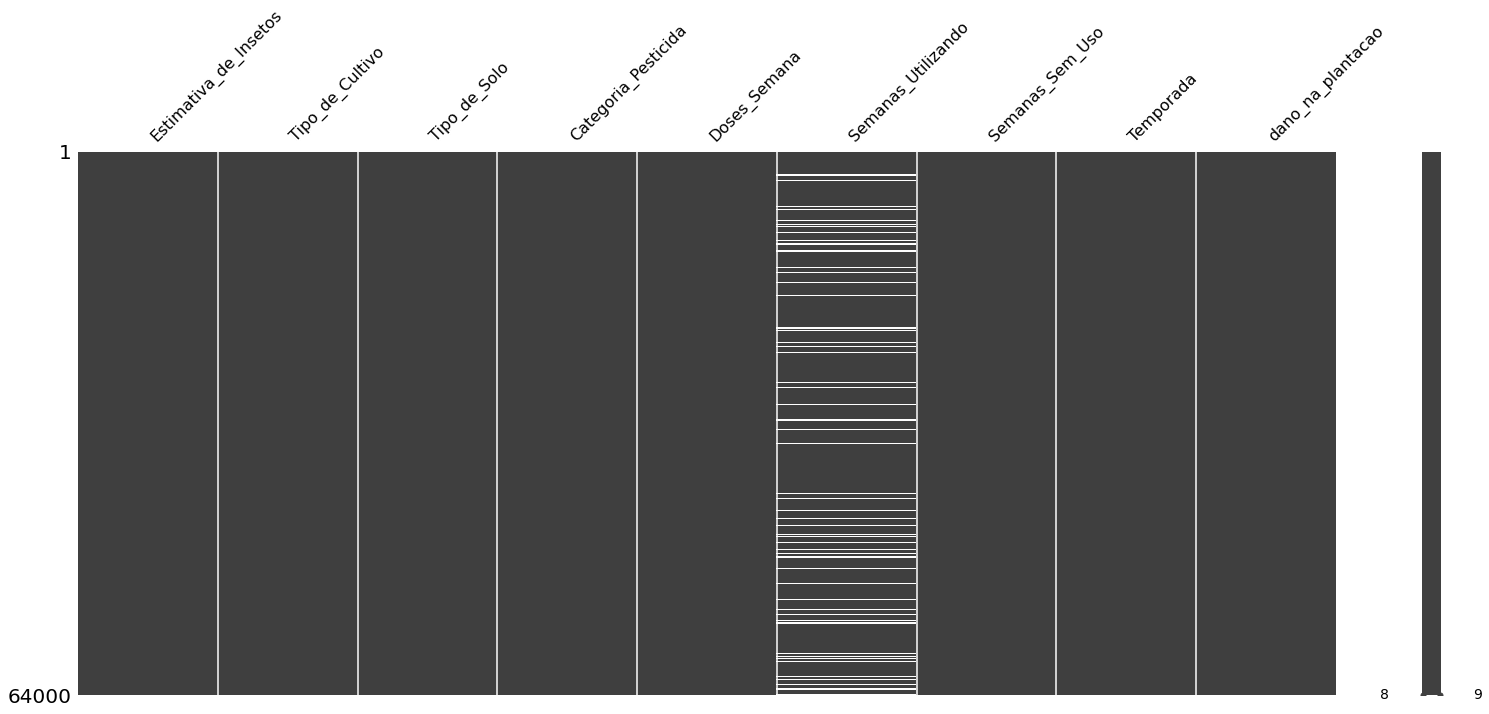

In [17]:
#Plotando a matrix para uma melhor visualização.
msno.matrix(df_train)

O dataset de treino apresenta apenas uma feature com dados faltosos, para preenchê-la utilizaremos a mediana. No entanto, nos dados de teste ou de produção, outras colunas podem conter valores faltosos e precisamos traçar estratégias para tratá-los.
Sendo assim, construiremos um pipeline em que variáveis numéricas serão imputadas com a mediana e variáveis categóricas serão imputadas com a moda. Vale salientar que nem sempre esse é o melhor método. Estratégias como imputação iterativa ou baseada em modelos como árvores de decisão e KNN também podem ser utilizadas, porém aumentam consideravelmente a complexidade da produtização desse modelo.

## Removendo colunas constantes

In [18]:
#Analisando se há colunas contantes para dropar. 
df_train, const_cols = remover_colunas_constantes(df_train)

# Exportando dados e dicionário de dados

In [19]:
# Deletando colunas (chaves-valor) excluidos do dicionário
cols_dropped = lista_to_drop
for column in cols_dropped:
    del dicionario_tipo[column]

In [20]:
# Salvando o dicionario como pickle
with open(META_DATA_PATH, 'wb') as f:
    cloudpickle.dump(dicionario_tipo, f)

In [21]:
#Salvando os dados de treino e de teste.
df_train.to_csv(os.path.join(DATA_INTER_PATH,DATA_INTER_TRAIN_NAME), index=False)

In [22]:
df_train.head()

,Estimativa_de_Insetos,Tipo_de_Cultivo,Tipo_de_Solo,Categoria_Pesticida,Doses_Semana,Semanas_Utilizando,Semanas_Sem_Uso,Temporada,dano_na_plantacao
27009,984,0,1,2,25,12.0,19,3,0
79477,851,0,0,2,20,27.0,7,2,0
76218,283,0,0,3,35,27.0,0,3,0
33382,2542,0,0,3,15,50.0,0,2,2
44927,850,0,1,2,30,14.0,24,2,0
